In [10]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras.layers import Input,Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [11]:
#b Load Traing and testing data
train_dir=r"C:\Users\Sohel\Downloads\cifar-10-img\cifar-10-img\train"
test_dir=r"C:\Users\Sohel\Downloads\cifar-10-img\cifar-10-img\test"

img_height,img_width=32,32
batch_size=32

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        image_size=(img_height,img_width),
        color_mode="rgb",
        batch_size=batch_size,
        label_mode="int",
        shuffle=True
)

test_ds=tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,
        image_size=(img_height,img_width),
        color_mode="rgb",
        batch_size=batch_size,
        label_mode="int",
        shuffle=False
)


Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.


In [12]:
#Normalize data
def normalize_img(image,label):
    image=tf.cast(image,tf.float32)/255.0
    return image,label

train_ds=train_ds.map(normalize_img)
test_ds=test_ds.map(normalize_img)

In [13]:
# Converting labels to onehot encoding
train_ds=train_ds.map(lambda x,y:(x,tf.one_hot(y,depth=10)))
test_ds=test_ds.map(lambda x,y:(x,tf.one_hot(y,depth=10)))

In [17]:
# c. Model Architecture

model= Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [18]:
#d. Train
history=model.fit(train_ds,validation_data=test_ds,epochs=20)

Epoch 1/20
1253/1253 [==============================] - 12s 9ms/step - loss: 1.9009 - accuracy: 0.3170 - val_loss: 1.7798 - val_accuracy: 0.3750
Epoch 2/20
1253/1253 [==============================] - 12s 9ms/step - loss: 1.7206 - accuracy: 0.3871 - val_loss: 1.7343 - val_accuracy: 0.3773
Epoch 3/20
1253/1253 [==============================] - 11s 9ms/step - loss: 1.6404 - accuracy: 0.4180 - val_loss: 1.6470 - val_accuracy: 0.4136
Epoch 4/20
1253/1253 [==============================] - 12s 9ms/step - loss: 1.5878 - accuracy: 0.4362 - val_loss: 1.6360 - val_accuracy: 0.4226
Epoch 5/20
1253/1253 [==============================] - 12s 10ms/step - loss: 1.5451 - accuracy: 0.4544 - val_loss: 1.5816 - val_accuracy: 0.4412
Epoch 6/20
1253/1253 [==============================] - 12s 10ms/step - loss: 1.5060 - accuracy: 0.4668 - val_loss: 1.5769 - val_accuracy: 0.4390
Epoch 7/20
1253/1253 [==============================] - 13s 10ms/step - loss: 1.4708 - accuracy: 0.4800 - val_loss: 1.5829 - val

In [19]:
#e Evaluate

loss,accuracy=model.evaluate(test_ds)
print(f"Test loss : {loss:.4f}")
print(f"Test Accuracy : {accuracy:.4f}")

311/311 [==============================] - 2s 6ms/step - loss: 1.4156 - accuracy: 0.5052
Test loss : 1.4156
Test Accuracy : 0.5052


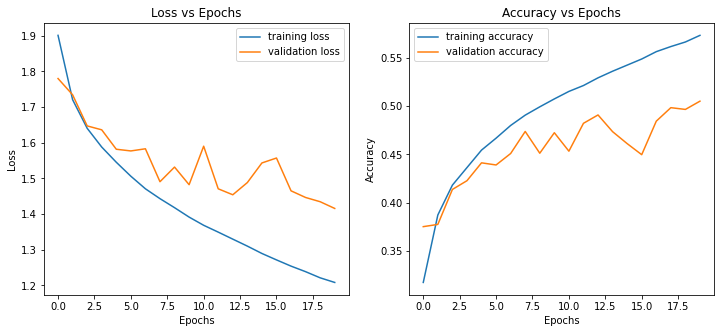

In [20]:
#f plot loss and accuracy

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
